<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://media-exp1.licdn.com/dms/image/C4E0BAQGQ65Yl7rn-Og/company-logo_200_200/0/1612547658975?e=2159024400&v=beta&t=pzTFuHPYw1kBh_HZPoz4MhlosU8jiLp6V32zUh4GW1o" width='30%'> 
</center>

----------

<h1 align="center"> Logistic Regression </h1><br>
<h1 align="center"> <font size='4'>  May 16, 2021 </font><font size='4'>Farius Tjioesman </font></h1><br>

----------

## Classification API

- Simple way to train fashion dataset from TensorFlow Fashion MNIST
    - https://www.tensorflow.org/datasets/catalog/fashion_mnist

- Image Pre-Processing Reference from Pillow
    - https://auth0.com/blog/image-processing-in-python-with-pillow/
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import img_to_array

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist

from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Fashion MNIST Dataset

Downloading 70K examples for labeled fashion classification split into train and test dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 60K dataset was allocated to train dataset (each image has 28 x 28 pixels resolution)

In [3]:
X_train.shape

(60000, 28, 28)

## 10K dataset was allocated to test dataset (also with 28 x 28 pixel resolution)

In [4]:
X_test.shape

(10000, 28, 28)

## Example of 8th dataset (a sandal with grayscale values and jpg preview)

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0 

  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0 

  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0 

  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0 

  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0 

  0   0   0   0   0   0   0   0   0   1   0   0  13  62 154  62   0   0   0   0   0   0 

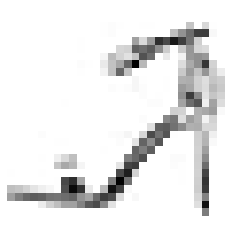

In [5]:
# grayscale value
example = 8
for i in range(28):
    for j in list(X_train[example][i]):
      print('  '[:3-len(str(j))]+str(j), end=' ')
    print('\n')

# grayscale image    
plt.imshow(X_train[example], cmap='gray_r')
plt.axis('off');


## Build new list class_names based on TensorFlow website (Zalando Research Germany)

![image.png](attachment:image.png)

In [6]:
class_names = 't-shirt trouser pullover dress coat sandal shirt sneaker bag boot'.split()
class_names

['t-shirt',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'boot']

## Check data distribution between 60K train dataset (each class was equally represented)

In [7]:
for i in range (10):
    print(class_names[pd.Series(y_train).value_counts().keys()[i]],"    \t\t",\
          pd.Series(y_train).value_counts().values[i])

boot     		 6000
bag     		 6000
sneaker     		 6000
shirt     		 6000
sandal     		 6000
coat     		 6000
dress     		 6000
pullover     		 6000
trouser     		 6000
t-shirt     		 6000


## Train the Model
-  Preprocessed the data by transforming 2D images (a matrix) into 1D (a list) 
-  Get overall accuracy Logistic regression score

In [8]:
# Example of reshape data into 1d for sklearn Logistic Regresion

X_TRAIN = X_train.reshape(60000, -1)
X_TEST = X_test.reshape(10000, -1)

print('data shape before reshape', X_train.shape)
print('data shape after reshape', X_TRAIN.shape)

data shape before reshape (60000, 28, 28)
data shape after reshape (60000, 784)


In [9]:
# Training the model
lr = LogisticRegression()
lr.fit(X_TRAIN, y_train)

# Assessing the model
lr.score(X_TEST, y_test)

0.8412

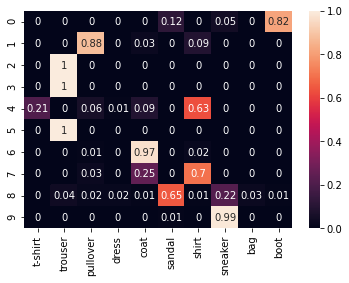

In [10]:
# Example of first ten dataset probabilistic classification : 10K in total

df = pd.DataFrame(lr.predict_proba(X_TEST)).rename(columns={0:class_names[0],1:class_names[1],2:class_names[2]})\
.rename(columns={3:class_names[3],4:class_names[4],5:class_names[5],6:class_names[6]})\
.rename(columns={7:class_names[7],8:class_names[8], 9:class_names[9]}).round(2).head(10)

sns.heatmap(df, annot=True);



  0   0   0   0  57 141  94 117  91  77  76  75  73  67  74  83  78  78  83  90  81  77  76   8   0   0   0   0 

  0   0   0   0 156 225 207 217 218 216 215 214 216 215 216 218 216 214 216 221 221 218 217  50   0   0   0   0 

  0   0   0   0 171 233 219 228 225 221 219 225 222 219 220 224 223 220 219 224 225 229 242  90   0   0   0   0 

  0   0   0   1 163 225 219 222 212 211 217 221 213 214 216 218 217 217 217 216 220 227 240 103   0   0   0   0 

  0   0   0  41 223 214 222 220 212 215 223 218 215 221 221 220 218 219 219 218 222 219 233 160   0   0   0   0 

  0   0   0  76 178 221 230 216 214 221 224 215 219 222 223 220 219 219 219 218 221 224 212 135  34   0   0   0 

  0   0  23 152 130 235 229 212 218 224 220 215 220 221 222 219 219 219 218 219 218 220 205 153 146   0   0   0 

  0   0  61 221 150 232 218 214 223 224 217 218 222 223 222 219 220 220 220 222 217 216 202 145 185   1   0   0 

  0   0 108 213 128 225 211 221 224 221 217 221 221 225 220 221 220 221 223 225 225 228 

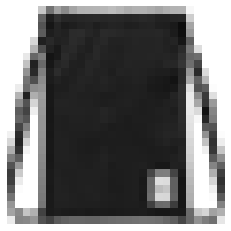

In [11]:
# SIMPLE CLASSIFICATION API
imgURL = "https://cdn.shopify.com/s/files/1/1230/9376/products/HER-10357_7EBlack.jpg?v=1594531770"

#SAVING ABOVE IMAGE LOCALLY TEMPORARILY
urllib.request.urlretrieve(imgURL, "temp.jpg")

# IMAGE TRANSFORMATION
im1 = Image.open("temp.jpg")                   # ORIGINAL IMAGE
im2 = im1.resize((28, 28))                     # RESIZE INTO 28 x 28 PIXEL RESOLUTIONS
im3 = ImageEnhance.Brightness(im2).enhance(1)  # CLEANING BACKGROUND NOISE, THE HIGHER THE BETTER
im4 = im3.split()[0]                           # FILTERING RED (R) COLOR COMPONENT 
im5 = im3.split()[1]                           # FILTERING GREEN (G) COLOR COMPONENT
im6 = im3.split()[2]                           # FILTERING BLUE (B) COLOR COMPONENT

# Numpize and flattened into 1D shape 
im7 = img_to_array(im5)                        # CONVERT JPG INTO NUMPY ARRAY
prediction = lr.predict_proba(im7              # USE ABOVE MNIST MODEL TO PREDICT 
              .reshape(784,-2).T).tolist()[0]  # FLATTEN 28 x 28 matrix into 1D data

# grayscale value
for i in range(28):
    for j in list(255-im7.astype(int).reshape(28,28)[i]):
      print('  '[:3-len(str(j))]+str(j), end=' ')
    print('\n')

# grayscale image    
plt.imshow(im5.convert('RGB'))                 # TAKE ONE OF THE RGB : green (in this case)
plt.axis('off');

#Probabilistic clasification (%) : 0 to 100
for i in range (10):
    print(class_names[i],"    \t\t",\
          round(prediction[i]*100,3))